# MNIST dataset classification
- Sem Kieboom
- Abel van Dijk
- Mark Hendrikx
- Luuk Kessels

In dit document, wordt de MNIST dataset geclassificeerd met behulp van verschillende machine learning modellen.




### Imports en setup

In [382]:
import random
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from PIL import Image
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

seed = 50
np.random.seed(seed)
random.seed(seed)

# Load dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Verkenning en datavoorbereiding
De data bestaat uit 1797 samples van 8x8 pixels. De target is een getal van 0 tot 9. De data is al in een goede vorm voor machine learning, dus er hoeft niet veel aan gedaan te worden. Ook is er geen sprake van missende data. Ook lijkt de verdeling van de data goed, alle getallen komen ongeveer even vaak voor (9.68% - 10.18%).


In [383]:
print("Num of images, and num of pixels: "+ str(X.shape))
print("Y values: "+str({int(i) for i in set(y)}))
# check how many of each number there are in the dataset in percentages
for i in range(10):
    print(f"{i}: {np.round(len(y[y == i]) / len(y) * 100, 2)}%")


Num of images, and num of pixels: (1797, 64)
Y values: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
0: 9.91%
1: 10.13%
2: 9.85%
3: 10.18%
4: 10.07%
5: 10.13%
6: 10.07%
7: 9.96%
8: 9.68%
9: 10.02%


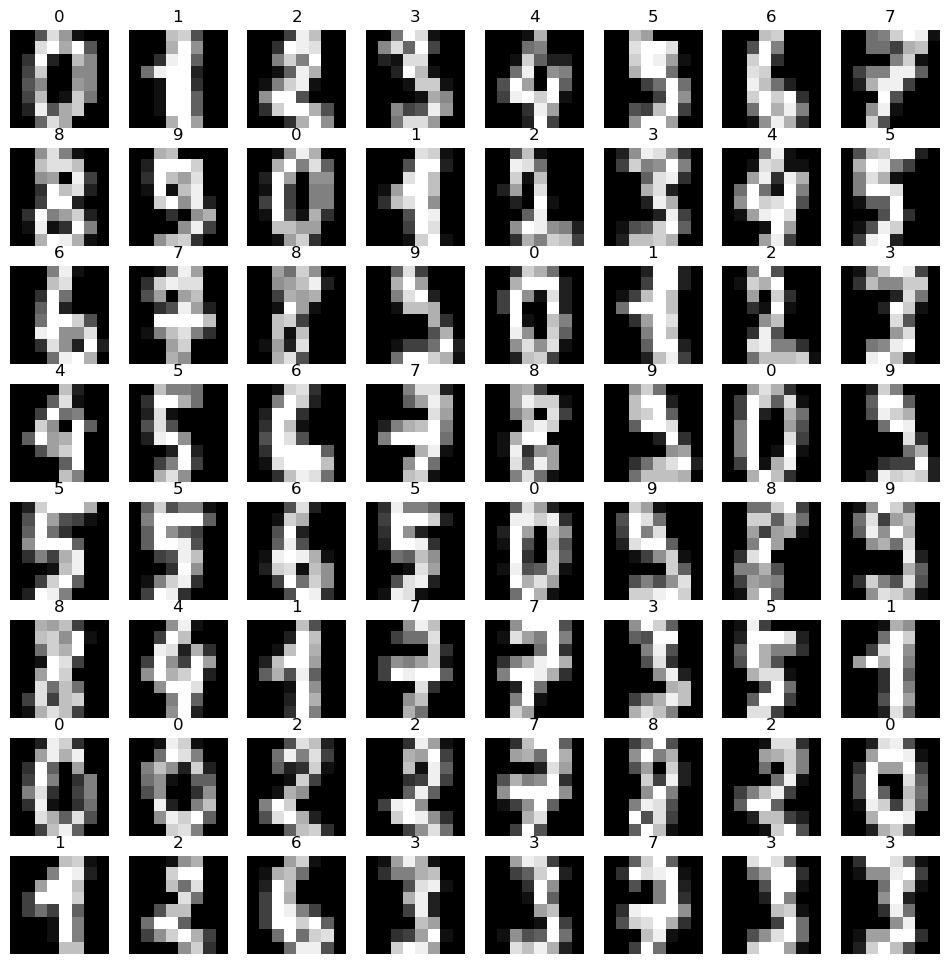

X contains None values:  False
y contains None values:  False
X Contains 0 values:  False


In [384]:
# show the first 64 images with their labels
plt.figure(figsize=(12, 12))
for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
    plt.title(y[i])
    plt.axis('off')
plt.show()

print("X contains None values: ", (X == None).all())
print("y contains None values: ", (y == None).all())
print("X Contains 0 values: ", (X == 0).all())

models = []

## Modelkeuze en implementatie
De volgende modellen kunnen worden gebruikt voor classificatie:

### decision tree
Een decision tree is een veelgebruikt machine learning algoritme, wat een boomstructuur maakt van beslissingen. Het is een goed algoritme om te gebruiken voor simpele classificatie.
- voordelen:
    - makkelijk te begrijpen
    - weinig data voorbereiding nodig
    - kan zowel classificatie als regressie doen
- nadelen:
    - kan overfitten, vooral bij complexere trees
    - duurder om te trainen dan andere algoritmes
https://www.ibm.com/think/topics/decision-trees#:~:text=A%20decision%20tree%20is%20a,internal%20nodes%20and%20leaf%20nodes

### random forest

Random forest is een veelgebruikt machine learning algoritme, wat de output van meerdere decision trees combineert. Omdat het zowel classificatie als regressie kan doen, is het een flexibele keuze.
- voordelen:
    - kan overfitten voorkomen,
    - kan zowel classificatie als regressie doen
    - makkelijk om feature importance te berekenen
- nadelen:
    - duurder om te trainen dan decision trees
    - moeilijker te begrijpen dan decision trees, omdat het meerdere trees combineert

https://www.ibm.com/think/topics/random-forest#:~:text=Random%20forest%20is%20a%20commonly,both%20classification%20and%20regression%20problems

### logistic regression

Logistic regression is een veelgebruikt machine learning algoritme, het berekend de kans dat een input bij een bepaalde classificatie hoort. Het is een goed algoritme om te gebruiken voor classificatie.
- voordelen:
    - Werkt goed als de dataset 'linearly separable' is (de data kan in een rechte lijn gescheiden worden)
    - Minder gevoelig voor overfitting (wel vatbaar voor overfitting in datasets met veel features)
    - Makkelijk te implementeren en te begrijpen, efficient om te trainen

- nadelen:
    - Kan niet goed omgaan met non-lineaire data
    - Kan niet goed omgaan met veel features, vooral als er meer features zijn dan observaties
    - Kan alleen binair classificeren

https://www.ibm.com/think/topics/logistic-regression https://medium.com/@akshayjain_757396/advantages-and-disadvantages-of-logistic-regression-in-machine-learning-a6a247e42b20

### k-nearest neighbors

K-nearest neighbors is een veelgebruikt machine learning algoritme, wat de classificatie van een input bepaald door te kijken naar de classificatie van de 'k' dichtsbijzijnde punten.
- voordelen:
    - makkelijk te begrijpen en te implementeren
    - past makkelijk aan aan nieuwe data

- nadelen:
    - Schaalt niet goed op (gebruikt meer geheugen en rekenkracht naarmate de dataset groter wordt)
    - Werkt niet goed op datasets met veel features
    - Gevoelig voor overfitting (vooral bij een lage k-waarde)

https://www.ibm.com/think/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20(KNN)%20algorithm%20is%20a%20non,used%20in%20machine%20learning%20today


In het volgende blok wordt er voor elke classifier een model gemaakt, getraind en getest op de test set. De accuracy score wordt geprint. De modellen staan op volgorde van accuracy score, met de beste score onderaan.




### Decision tree classifier

In [385]:
 #create a classifier using the tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
decision_tree = DecisionTreeClassifier(random_state=seed)
decision_tree.fit(x_train, y_train)
y_pred_dt = decision_tree.predict(x_test)
accuracy_score(y_test, y_pred_dt)
print(f"Accuracy score: {round((accuracy_score(y_test, y_pred_dt)*100),2)}%")
models.append(decision_tree)


Accuracy score: 84.44%


### Random forest classifier

In [386]:
# model
rnd_forest_model = RandomForestClassifier(random_state=seed)

# training
rnd_forest_model.fit(x_train, y_train)

# predict
y_pred_reg = rnd_forest_model.predict(x_test)

# accuracy_score
accuracy_score(y_test, y_pred_reg)
print(f"Accuracy score: {round((accuracy_score(y_test, y_pred_reg)*100),2)}%")

models.append(rnd_forest_model)

Accuracy score: 96.39%


### Logistic regression classifier


In [387]:
log_regression_model = LogisticRegression(max_iter=5000, random_state=seed)

log_regression_model.fit(x_train, y_train)

y_pred_lr = log_regression_model.predict(x_test)

accuracy_score(y_test, y_pred_lr)
print(f"Accuracy score: {round((accuracy_score(y_test, y_pred_lr)*100),2)}%")

models.append(log_regression_model)

Accuracy score: 96.67%


### K-nearest neighbors classifier

In [388]:
k_nearest_model = KNeighborsClassifier()

k_nearest_model.fit(x_train, y_train)

y_pred_k = k_nearest_model.predict(x_test)

accuracy_score(y_test, y_pred_k)
print(f"Accuracy score: {round((accuracy_score(y_test, y_pred_k)*100),2)}%")

models.append(k_nearest_model)

Accuracy score: 97.5%


Alle modellen lijken redelijk goede scores te halen, rond de 80 tot 99 procent accuraat. Echter kan het zijn dat de modellen overfitten op de data. Om dit te testen hebben we de modellen getest op eigen data. Omdat er andere methoden zijn gebruikt om deze data te creëren, verschilt deze data van de data in de MNIST dataset. Als de modellen goed presteren op deze data, betekent dit dat de modellen goed generaliseren en niet overfitten op de data.

### Testen op eigen data
We hebben zelf een aantal afbeeldingen gemaakt van de cijfers 0 tot 9. Deze afbeeldingen zijn 16x16 pixels groot en zijn in het zwart-wit. We hebben deze afbeeldingen omgezet naar 8x8 pixels, een numpy array en deze genormaliseerd naar een schaal van 0 tot 16. Ook hebben we de afbeeldingen omgedraaid, omdat de MNIST dataset de afbeeldingen in de dataset ook omgedraaid heeft. Met eigen data, lijkt de K-nearest neighbour classifier het beste te presteren, gevolgd door de Logistic regression. De Random forest classifier, en de Decision tree classifier presteren minder goed.

Model: DecisionTreeClassifier(random_state=50) Correct: 0/10


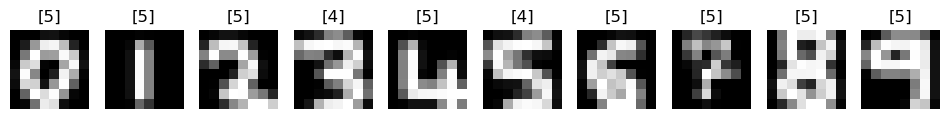


Model: RandomForestClassifier(random_state=50) Correct: 1/10


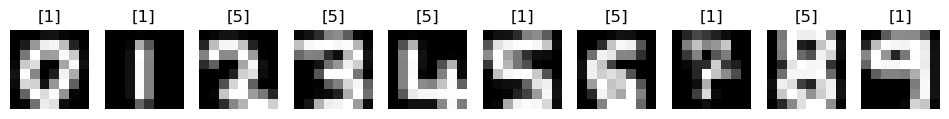


Model: LogisticRegression(max_iter=5000, random_state=50) Correct: 4/10


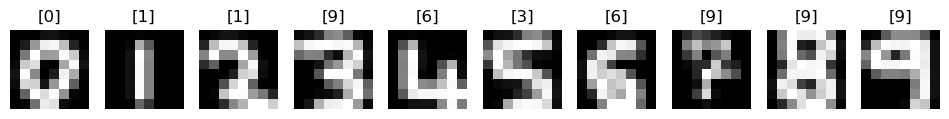


Model: KNeighborsClassifier() Correct: 7/10


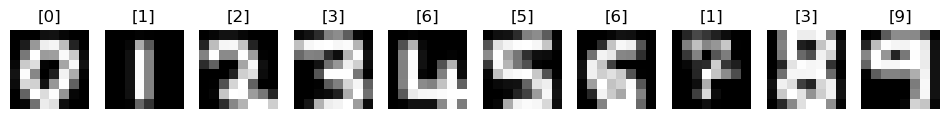

In [389]:
images = []
for i in range(10):
    image = Image.open(f'{i}.png').convert('L')
    image = image.resize((8, 8))  # Resize to 8x8 pixels
    image_array = np.array(image).reshape(1, 64)
    # normalize the 0-255 values to 0-16
    image_array = image_array / 16
    # flip the image to match the MNIST dataset
    image_array = 1 - image_array
    images.append(image_array)

for model in models:
    correct = 0
    for i in range(10):
        if model.predict(images[i]) == i:
            correct += 1
    print(f"Model: {model} Correct: {correct}/10")
    plt.figure(figsize=(12, 12))
    for i in range(10):
        plt.subplot(1, 10, i + 1)
        plt.imshow(images[i].reshape(8, 8), cmap='gray')
        plt.title(model.predict(images[i]))
        plt.axis('off')
    plt.show()
    print()
    correct = 0

## Model evaluatie en optimalisatie
Er zijn twee modellen die er boven uit springen, Logistic regression, en K-nearest neighbour. Wat opvalt, is dat de tree, en random forest classifiers zelfs de 'simpele' getallen 0 en 1, vaak verkeerd classificeren.
In het volgende hoofdstuk worden de classifiers geoptimaliseerd, om de extra data beter te classificeren. De code staat in comments, omdat het veel tijd kost om te runnen. In de markdown cellen onder de code, staat de output van de code.

### Decision tree classifier
De decision tree classifier presteert het slechtst van de vier modellen. Het model lijkt redelijk te werken op de test set, maar presteert slecht op de eigen data. Dit kan betekenen dat het model niet voldoende generaliseert en overfit op de data. Volgens Tilburg Science Hub https://tilburgsciencehub.com/topics/analyze/machine-learning/supervised/decision_trees/#:~:text=A%20standard%20method%20for%20addressing,using%20a%20decision%20tree%20algorithm. kan dit probleem worden opgelost door de hyperparameters van het model te optimaliseren. Namelijk:
- Maximale diepte van de boom reduceren
- Minimaal aantal samples per leaf verhogen
- Minimaal aantal samples per split verhogen
- Maximaal aantal leaf nodes reduceren
- Maximaal aantal features features voor het maken van een split reduceren

Output:

Het volgende blok code, test de decision tree classifier met verschillende hyperparameters, en kiest de classifier met de beste score op de eigen data. De volgende parameters produceren de beste tree: max_leaf_nodes=50, min_samples_leaf=2. Zelfs met deze optimalisatie, presteert de decision tree classifier nog steeds slechter dan de andere modellen. Daarom is het beter om een ander model te kiezen.





In [390]:
print(f'Depth of the tree: {decision_tree.get_depth()}')
print(f'Number of leaves: {decision_tree.get_n_leaves()}')
print(f'Number of nodes: {decision_tree.tree_.node_count}')

param_grid = {
    'max_depth': [None, 5,6,7,8,9,10,11,13,13,14,15],
    'min_samples_split': [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [2,3,4,5,6,7,8,9,10],
    'max_leaf_nodes': [None, 50,80, 100, 120, 140, 150],
}

def evaluate_on_extra_data(model, images):
    correct = 0
    for i in range(10):
        if model.predict(images[i]) == i:
            correct += 1
    return correct


# Train multiple trees and select the best one
best_score = 0
best_tree = None

# for max_depth in param_grid['max_depth']:
#     for min_samples_split in param_grid['min_samples_split']:
#         for min_samples_leaf in param_grid['min_samples_leaf']:
#             for max_leaf_nodes in param_grid['max_leaf_nodes']:
#                 # Create and train the Decision Tree
#                 decision_tree = DecisionTreeClassifier(
#                     max_depth=max_depth,
#                     min_samples_split=min_samples_split,
#                     min_samples_leaf=min_samples_leaf,
#                     max_leaf_nodes=max_leaf_nodes,
#                 )
#                 decision_tree.fit(x_train, y_train)
#
#                 # Evaluate the tree on extra data
#                 score = evaluate_on_extra_data(decision_tree, images)
#
#                 # Update the best tree if the current one is better
#                 if score > best_score:
#                     best_score = score
#                     best_tree = decision_tree
#
# # Print the best tree and its score
# print(f'Best Decision Tree: {best_tree}')
# print(f'Correct predictions on extra data: {best_score}/10')


Depth of the tree: 14
Number of leaves: 140
Number of nodes: 279


Output:
```
Depth of the tree: 14
Number of leaves: 138
Number of nodes: 275
Best Decision Tree: DecisionTreeClassifier(max_leaf_nodes=50, min_samples_leaf=2)
Correct predictions on extra data: 1/10
```

### Random forest classifier
De random forest classifier presteert iets beter dan de decision tree classifier, maar nog steeds slechter dan de logistic regression en k-nearest neighbors. Het model lijkt redelijk te werken op de test set, maar presteert slecht op de eigen data. Dit kan betekenen dat het model niet voldoende generaliseert en overfit op de data. Zoals bij de decusion tree classifier, kunnen de hyperparameters aangepast worden om het model te optimaliseren. Echter, zelfs met deze optimalisatie, presteert de random forest classifier nog steeds slechter dan de andere modellen. Daarom is het beter om een ander model te kiezen.

De beste random forest classifier heeft een score van 5/10 op de eigen data, de hyperparameters voor deze classifier zijn: max_depth=9, max_leaf_nodes=50, min_samples_leaf=3, n_estimators=10

Het verlagen van de diepte, het verhogen van het aantal samples per leaf, een maximum aantal leaf nodes, en het verlagen van het aantal trees in de forest, zorgt dus voor een aanzienlijke, maar lang niet perfecte verbetering van het model.

het model lijkt beter te zijn dan de decision tree classifier, maar nog steeds slechter dan de logistic regression en k-nearest neighbors. Daarom is het beter om een ander model te kiezen.


In [391]:
print(f'Number of trees: {rnd_forest_model.n_estimators}')
print(f'Max depth of the trees: {rnd_forest_model.max_depth}')
print(f'Min samples split: {rnd_forest_model.min_samples_split}')
print(f'Min samples leaf: {rnd_forest_model.min_samples_leaf}')
print(f'Max leaf nodes: {rnd_forest_model.max_leaf_nodes}')


param_grid = {
    'n_estimators': [10, 50, 100, 150, 200, 250, 300],
    'max_depth': [None, 5,6,7,8,9,10,11,13,13,14,15],
    'min_samples_split': [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [2,3,4,5,6,7,8,9,10],
    'max_leaf_nodes': [None, 50,80, 100, 120, 140, 150],
}

# Train multiple trees and select the best one
best_score = 0
best_tree = None

# for n_estimators in param_grid['n_estimators']:
#     for max_depth in param_grid['max_depth']:
#         for min_samples_split in param_grid['min_samples_split']:
#             for min_samples_leaf in param_grid['min_samples_leaf']:
#                 for max_leaf_nodes in param_grid['max_leaf_nodes']:
#                     # Create and train the Decision Tree
#                     rnd_forest_model = RandomForestClassifier(
#                         n_estimators=n_estimators,
#                         max_depth=max_depth,
#                         min_samples_split=min_samples_split,
#                         min_samples_leaf=min_samples_leaf,
#                         max_leaf_nodes=max_leaf_nodes,
#                     )
#                     rnd_forest_model.fit(x_train, y_train)
#
#                     # Evaluate the tree on extra data
#                     score = evaluate_on_extra_data(rnd_forest_model, images)
#
#                     # Update the best tree if the current one is better
#                     if score > best_score:
#                         best_score = score
#                         best_tree = rnd_forest_model
#
# # Print the best tree and its score
# print(f'Best Decision Tree: {best_tree}')
# print(f'Correct predictions on extra data: {best_score}/10')

Number of trees: 100
Max depth of the trees: None
Min samples split: 2
Min samples leaf: 1
Max leaf nodes: None


Output:
```
Number of trees: 100
Max depth of the trees: None
Min samples split: 2
Min samples leaf: 1
Max leaf nodes: None
Best Decision Tree: RandomForestClassifier(max_depth=9, max_leaf_nodes=50, min_samples_leaf=3,
                       n_estimators=10)
Correct predictions on extra data: 5/10
```


### Logistic regression classifier
De logistic regression classifier presteert redelijk goed op de test set, en presteert beter dan de decision tree en random forest classifiers op de eigen data (Ongeveer 6/10 correct). Deze score is alsnog aanzienlijk lager dan de accuracy score op de testset. Dit betekend dat het model niet voldoende generaliseert en overfit op de data. Om dit te verhelpen, kunnen de hyperparameters van het model worden aangepast. Volgens IBM https://www.ibm.com/think/topics/logistic-regression kan dit probleem worden opgelost door de hyperparameters van het model te optimaliseren. Namelijk: Het verlagen van het aantal predictors, en het verhogen van de regularisatie parameter.

De volgende code creëert logistic regression classifiers, met verschillende regularisatie parameters (C), een C waarde van 0.05 scoort het hoogste. Hiermee wordt de data ongeveer 9/10 keer correct geclassificeerd. Dit is een aanzienlijke verbetering ten opzichte van de vorige score, maar nog steeds lager dan de accuracy score op de testset. Het is een hogere score dan k-means origineel kan leveren.

In [392]:
print(f'Regularization parameter: {log_regression_model.C}')

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

param_grid = {
    'C': [0.001, 0.005, 0.01, 0.05, 0.1, 1, 10, 100, 1000],
}
# Train multiple trees and select the best one
best_score = 0
best_tree = None

for C in param_grid['C']:
    # Create and train the Logistic Regression model
    log_regression_model = LogisticRegression(C=C, random_state=seed)
    log_regression_model.fit(x_train_scaled, y_train)

    # Evaluate the model on the extra data
    score = evaluate_on_extra_data(log_regression_model, images)

    # Update the best model if the current one is better
    if score > best_score:
        best_score = score
        best_tree = log_regression_model

# Print the best tree and its score
print(f'Best Decision Tree: {best_tree}')
print(f'Correct predictions on extra data: {best_score}/10')




Regularization parameter: 1.0
Best Decision Tree: LogisticRegression(C=0.01, random_state=50)
Correct predictions on extra data: 9/10


### K-nearest neighbors classifier
De k-nearest neighbors classifier presteert het beste van de vier modellen, met een score van 7/10 op de eigen data. Dit is een aanzienlijke verbetering ten opzichte van de vorige score, maar nog steeds lager dan de accuracy score op de testset. Dit betekend dat het model niet voldoende generaliseert en overfit op de data. Om dit te verhelpen, kunnen de hyperparameters van het model worden aangepast. Volgens IBM https://www.ibm.com/think/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20(KNN)%20algorithm%20is%20a%20non,used%20in%20machine%20learning%20today. zijn er twee hyperparameters die geoptimaliseerd kunnen worden, de K waarde, en de afstand functie. De K waarde bepaald hoeveel buren er worden meegenomen in de classificatie, en de afstand functie bepaald hoe de afstand tussen de punten wordt berekend. In het volgende blok wordt de beste K waarde en afstand functie gekozen.

Het resultaat van deze code is een classifier die de extra data 7/10 keer correct classificeert. Dit is geen verbetering ten opzichte van de originele score.

In [393]:
# print the current k value and distance
print(f'K value: {k_nearest_model.n_neighbors}')
print(f'Distance function: {k_nearest_model.metric}')

param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}
# Train multiple trees and select the best one
best_score = 0
best_tree = None

for n_neighbors in param_grid['n_neighbors']:
    for metric in param_grid['metric']:
        # Create and train the K-nearest neighbors model
        k_nearest_model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
        k_nearest_model.fit(x_train, y_train)

        # Evaluate the model on the extra data
        score = evaluate_on_extra_data(k_nearest_model, images)

        # Update the best model if the current one is better
        if score > best_score:
            best_score = score
            best_tree = k_nearest_model
# Print the best tree and its score
print(f'Best Decision Tree: {best_tree}')
print(f'Correct predictions on extra data: {best_score}/10')

K value: 5
Distance function: minkowski
Best Decision Tree: KNeighborsClassifier(metric='euclidean', n_neighbors=4)
Correct predictions on extra data: 7/10


## Explainable AI (XAI) analyse
De logistic regression en k-nearest neighbors classifiers zijn de beste classifiers, met een score van 9/10 en 7/10 op de eigen data. Daarom worden deze twee classifiers gebruikt voor de XAI analyse. De XAI analyse wordt gedaan met behulp van SHAP (SHapley Additive exPlanations). Dit is een methode om de output van een model te verklaren, door te kijken naar de bijdrage van elke feature aan de output. Dit kan helpen om te begrijpen waarom een model een bepaalde classificatie maakt, en kan helpen om te zien of het model overfit op de data.

De volgende code produceert twee plots voor beide classifiers. De eerste plot is een heatmap van de feature importance, de tweede plot laat een 8x8 grid zien van de pixels, met de feature importance van elke pixel. Dit laat zien welke pixels het belangrijkst zijn voor de classificatie van het model. Anders gezegd, de pixels die het meest bijdragen aan de classificatie van het model. Dit kan helpen om te begrijpen waarom het model een bepaalde classificatie maakt, en kan helpen om te zien of het model overfit op de data. De belan

### Logistic regression classifier
De heatmap laat zien dat de pixels in het midden van de afbeelding het belangrijkst zijn voor de classificatie, terwijl de pixels aan de randen minder belangrijk zijn. Dit is logisch, omdat de cijfers in het midden van de afbeelding staan, en de randen minder informatie bevatten. De pixel op 3,3 is het belangrijkst voor de classificatie van het model.

Variable Importance Plot - Global Interpretation


C:\Users\Abel\AppData\Local\Temp\ipykernel_13904\2377761386.py:12: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, x_test_scaled)


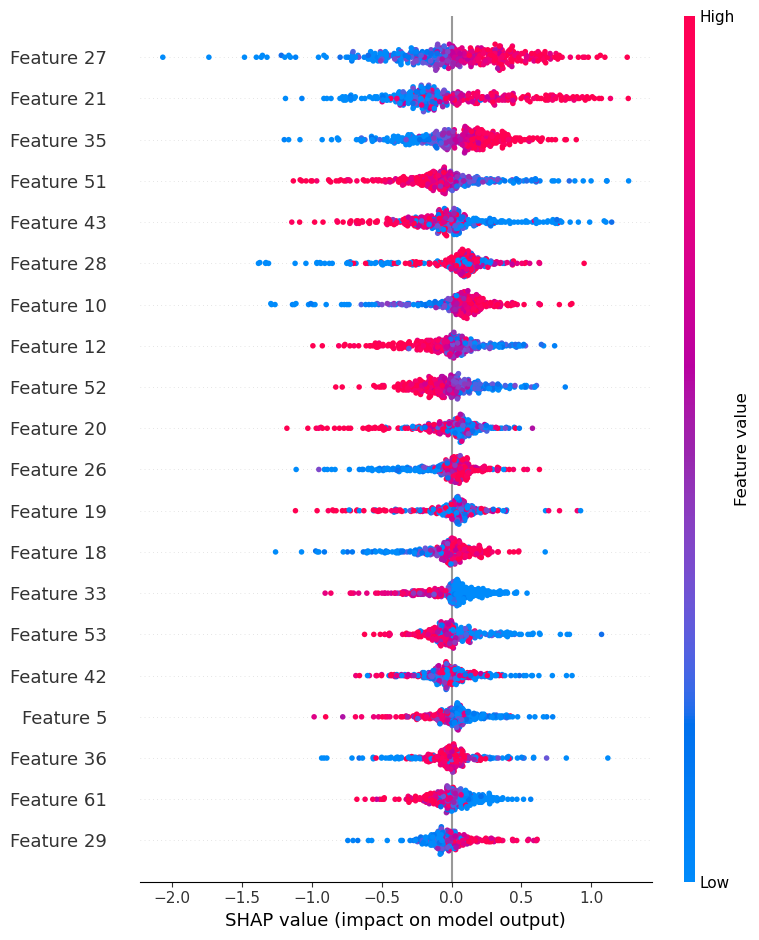

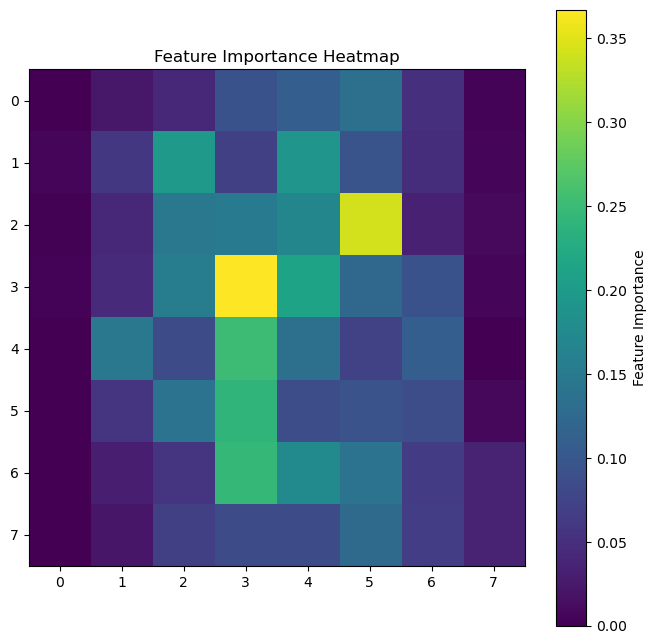

In [396]:
shap.initjs()

def model_predict(x):
    return log_regression_model.predict(x)

explainer = shap.Explainer(model_predict, x_train_scaled)

shap_values = explainer(x_test_scaled)

print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, x_test_scaled)

mean_shap_values = np.mean(np.abs(shap_values.values), axis=0)
shap_grid = mean_shap_values.reshape(8, 8)
plt.figure(figsize=(8, 8))
plt.imshow(shap_grid, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Feature Importance')
plt.title('Feature Importance Heatmap')
plt.show()



### K-nearest neighbors classifier
Ook bij de k-nearest neighbors classifier zijn de pixels in het midden van de afbeelding het belangrijkst voor de classificatie, terwijl de pixels aan de randen minder belangrijk zijn. Dit is logisch, omdat de cijfers in het midden van de afbeelding staan, en de randen minder informatie bevatten. De pixel op 4,3 is het belangrijkst voor de classificatie van het model.


PermutationExplainer explainer: 361it [00:29,  8.17it/s]                         
C:\Users\Abel\AppData\Local\Temp\ipykernel_13904\1864426963.py:7: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, x_test)


Variable Importance Plot - Global Interpretation


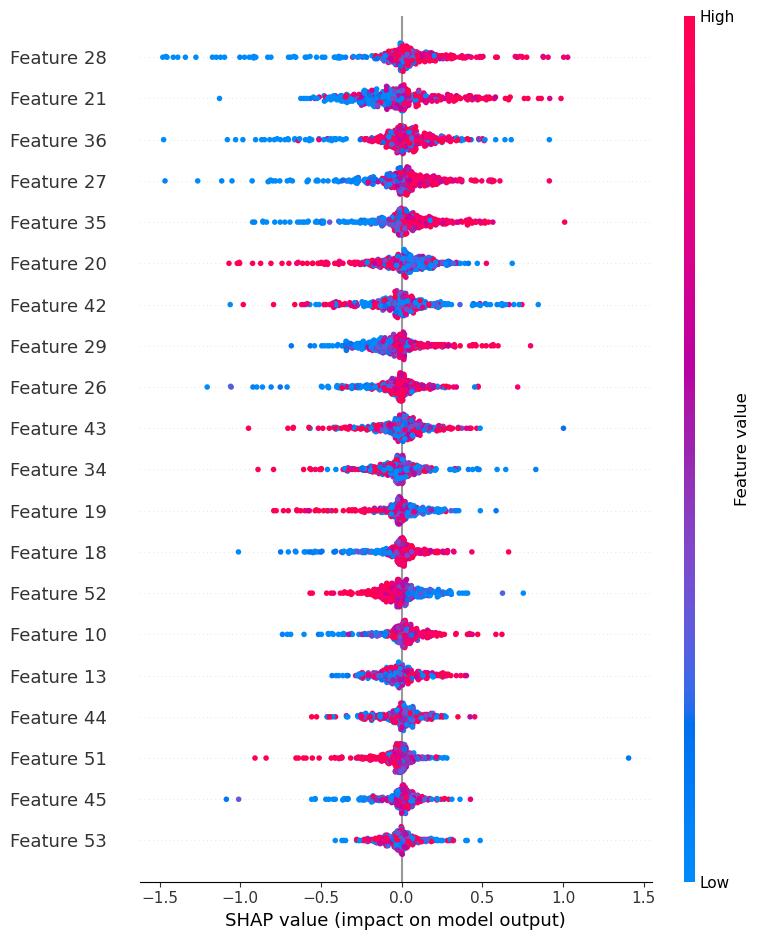

Text(0.5, 1.0, 'Feature Importance Heatmap')

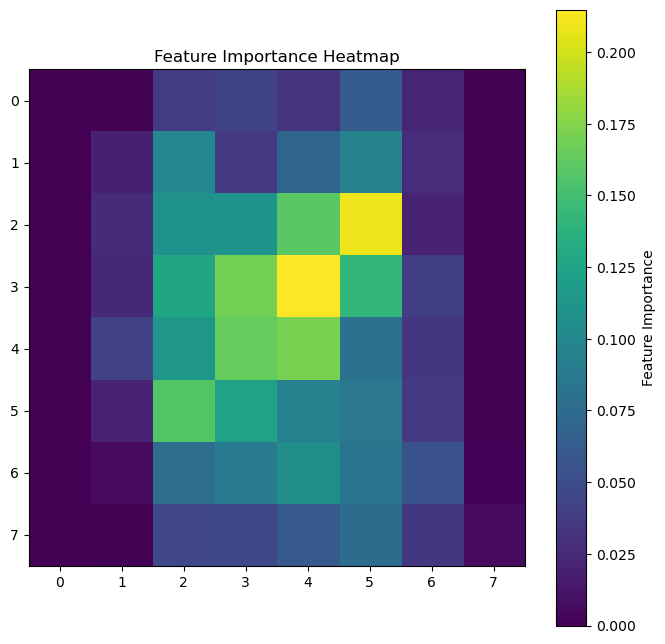

In [397]:
def model_predict(x):
    return k_nearest_model.predict(x)
explainer = shap.Explainer(model_predict, x_train)
shap_values = explainer(x_test)
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, x_test)
mean_shap_values = np.mean(np.abs(shap_values.values), axis=0)
shap_grid = mean_shap_values.reshape(8, 8)
plt.figure(figsize=(8, 8))
plt.imshow(shap_grid, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Feature Importance')
plt.title('Feature Importance Heatmap')


Door alle data over elkaar heen te leggen, kunnen we zien dat de linker en rechterrand inderdaad geen informatie bevatten, en dat de meeste informatie in het midden van de afbeelding zit. de twee pixels in het midden boven, en onder, worden door de meeste afbbeeldingen gevuld, en zijn dus ook relatief onbelangrijk voor de classificatie.

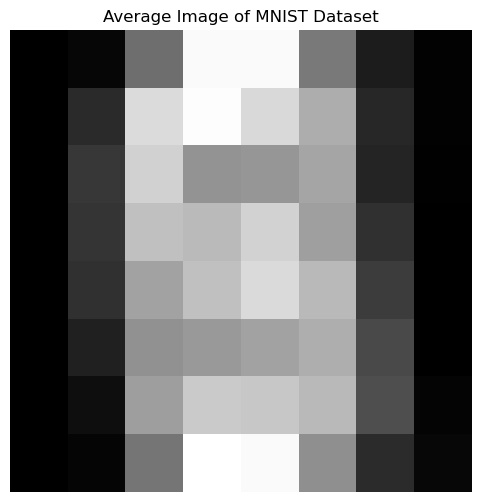

In [398]:
average_image = np.mean(X, axis=0)

# Reshape the average image to 8x8
average_image = average_image.reshape(8, 8)

# Plot the average image
plt.figure(figsize=(6, 6))
plt.imshow(average_image, cmap='gray')
plt.title('Average Image of MNIST Dataset')
plt.axis('off')
plt.show()

## Conlusie en reflectie